/var/folders/y4/gwklw6bn515619y8_gmw0mrm0000gn/T/ipykernel_7639/971446202.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nosymb = Google["Price"].str.replace("$", "")
/var/folders/y4/gwklw6bn515619y8_gmw0mrm0000gn/T/ipykernel_7639/971446202.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= Apple.append(Google, ignore_index = True)


(18037, 5)
(16563, 5)
NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)
NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)
0.14206054745123442
0
0


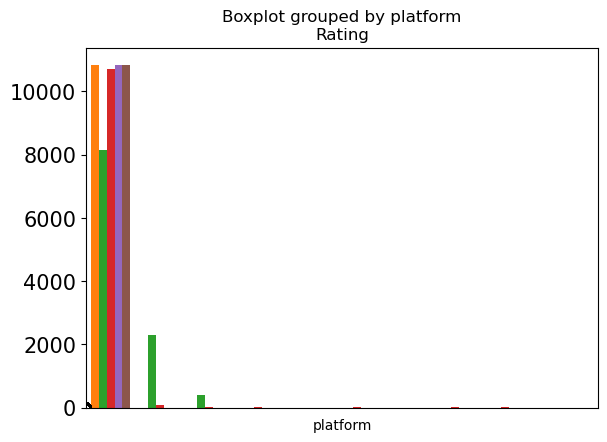

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random
google = "google.csv"
Google = pd.read_csv(google)
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]
Google.head(3)
Google['Price'].unique()
Google[Google['Price']=='Everyone']
Google = Google[Google['Price'] != 'Everyone']
nosymb = Google["Price"].str.replace("$", "")
Google["Price"] = pd.to_numeric(nosymb)
Google['Reviews'] = pd.to_numeric(Google['Reviews'])
Google['platform'] = 'google'
apple = 'apple.csv'
Apple = pd.read_csv(apple)
Apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
Apple.head(3)
Apple['platform'] = 'apple'
old_names = Apple.columns
new_names = Google.columns
Apple = Apple.rename(columns = dict(zip(old_names,new_names)))
df= Apple.append(Google, ignore_index = True)
df.sample(12)
print(df.shape)
df = df.dropna()
print(df.shape)
df[df['Reviews'] == 0].count()
df = df[df['Reviews'] != 0]
df.groupby(by='platform')['Rating'].describe()
df.boxplot(by='platform', column=['Rating'], grid=False, rot=45, fontsize=15)
apple = df[df['platform'] == 'apple']['Rating']
google = df[df['platform'] == 'google']['Rating']
apple_normal = stats.normaltest(apple)
print(apple_normal)
google_normal = stats.normaltest(google)
print(google_normal)
histoApple = plt.hist(apple)
histoGoogle = plt.hist(Google)
df['Permutation1'] = np.random.permutation(df['Rating'])
df.groupby(by='platform')['Permutation1'].describe()
df.groupby(by='platform')['Rating'].describe()
difference = list()

for i in range(10000):
    permutation = np.random.permutation(df['Rating'])
    difference.append(np.mean(permutation[df['platform']=='apple']) - np.mean(permutation[df['platform']=='google']))
histo = plt.hist(difference)
obs_difference = np.mean(apple) - np.mean(google)
obs_difference = abs(obs_difference)
print(obs_difference)
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i] >= obs_difference):
        positiveExtremes.append(difference[i])
    elif (difference[i] <= -obs_difference):
        negativeExtremes.append(difference[i])

print(len(positiveExtremes))
print(len(negativeExtremes))